# Irish Wind Data

In this Notebook, we follow Tilmanm  Gneiting experiment as presented in his paper: [Nonseparable, stationary Covariance Functions for Space-Time Data](http://www.jstor.org/stable/3085674).



In [1]:
#Import statements
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

pd.options.display.max_rows = 12 #Setting the maximal number of displayed rows for a dataframe 


# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [2]:
#Read the data into a dataframe

df = pd.read_csv('Ireland_wind_data.csv', names=['Year', 'Month', 'Day', 'RPT', 'VAL', 'ROS', 
                                                 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
                delim_whitespace=True)
#Fix years
df['Year'] += 1900

#print(df.dtypes)

#df.assign(Date=pd.to_datetime(df[['Year', 'Month']].assign(day=1)))

#print(pd.to_datetime(df[['Year', 'Month', 'Day']]))
df

Year  Month  Day    RPT    VAL    ROS    KIL    SHA    BIR    DUB  \
0     1961      1    1  15.04  14.96  13.17   9.29  13.96   9.87  13.67   
1     1961      1    2  14.71  16.88  10.83   6.50  12.62   7.67  11.50   
2     1961      1    3  18.50  16.88  12.33  10.13  11.17   6.17  11.25   
3     1961      1    4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   
4     1961      1    5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   
5     1961      1    6  13.21   8.12   9.96   6.67   5.37   4.50  10.67   
...    ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
6568  1978     12   26  13.83  11.87  10.34   2.37   6.96   4.29   1.96   
6569  1978     12   27  17.58  16.96  17.62   8.08  13.21  11.67  14.46   
6570  1978     12   28  13.21   5.46  13.46   5.00   8.12   9.42  14.33   
6571  1978     12   29  14.00  10.29  14.42   8.71   9.71  10.54  19.17   
6572  1978     12   30  18.50  14.04  21.29   9.13  12.75   9.71  18.08   
6573  1978     12   31  20.33  17.41  27.29   9.59  12.08  10.13  19.25   

        CLA    MUL    CLO    BEL    MAL  
0     10.25  10.83  12.58  18.50  15.04  
1     10.04   9.79   9.67  17.54  13.83  
2      8.04   8.50   7.67  12.75  12.71  
3      1.79   5.83   5.88   5.46  10.88  
4      6.54  10.92  10.34  12.92  11.83  
5      4.42   7.17   7.50   8.12  13.17  
...     ...    ...    ...    ...    ...  
6568   3.79   3.04   3.08   4.79  11.96  
6569  15.59  14.04  14.00  17.21  40.08  
6570  16.25  15.25  18.05  21.79  41.46  
6571  12.46  14.50  16.42  18.88  29.58  
6572  12.87  12.46  12.12  14.67  28.79  
6573  11.63  11.58  11.38  12.08  22.08  

[6574 rows x 15 columns]

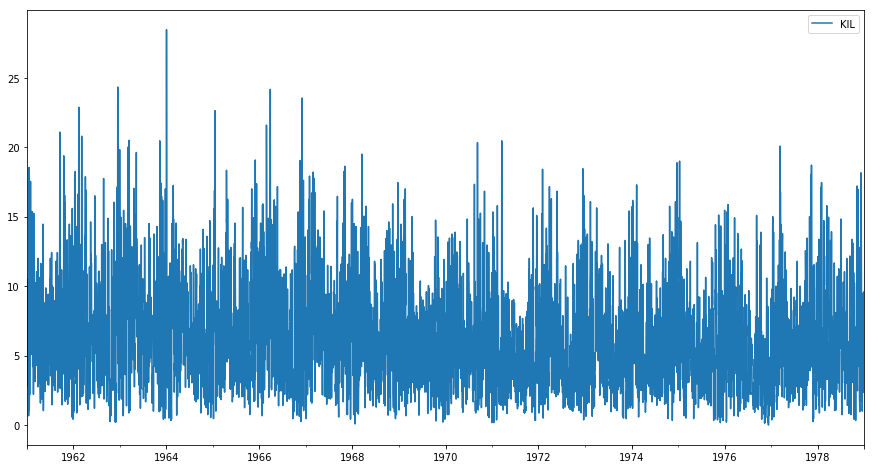

In [3]:
#Testing if ploting data works


df.plot(x=pd.to_datetime(df[['Year', 'Month', 'Day']]), y='KIL', figsize=(15,8) )
#df.plot(x=pd.to_datetime(df[['Year', 'Month', 'Day']]), y='MAL', figsize=(15,8) )

In [4]:
#Square root transformation and changing knots to meters per second
#df['RPT'] = np.sqrt(df['RPT'] * 0.514444444)

#df_wind_data = df[['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']]

#Roslare Ros is not used in Tilmann analysis due to being uncorrelated to the rest of the stations

df_wind_data = df[['RPT', 'VAL', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']]

for column in df_wind_data:
    df[column] = np.sqrt(df[column] * 0.514444444)

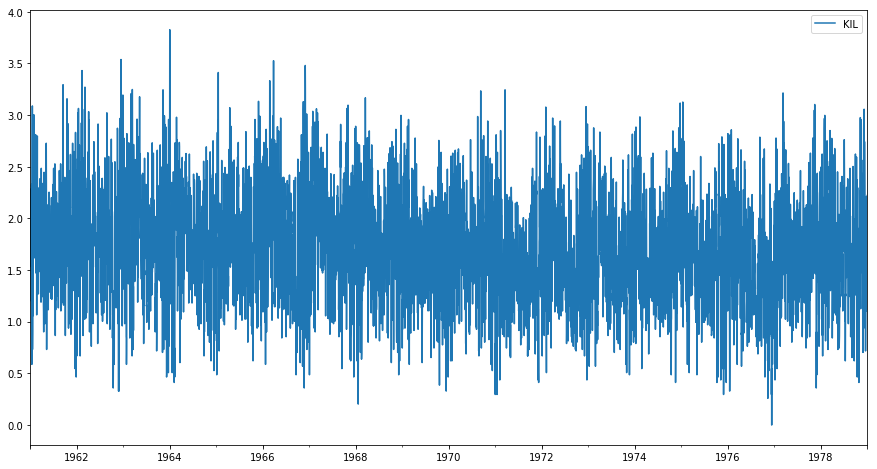

In [5]:
#Testing if ploting data works

df.plot(x=pd.to_datetime(df[['Year', 'Month', 'Day']]), y='KIL', figsize=(15,8))

In [6]:
print(df['RPT'].mean())
df['RPT'] = np.sqrt(df['RPT'])
print(df['RPT'].mean())

2.45457157796
1.5552777114


In [7]:

df['RPT'] = np.sqrt(df['RPT'] * 0.514444444)
print(df['RPT'].mean())

0.89278162326


In [8]:
#calculating emperical covariance

std_test1=np.std(df['RPT'])
for column in df_wind_data: 
    std_test2=np.std(df[column])
    print(np.cov(df['RPT'],df[column])/(std_test1*std_test2))

[[ 1.00015214  1.00015214]
 [ 1.00015214  1.00015214]]
[[  0.09199897   0.80568746]
 [  0.80568746  10.8729941 ]]
[[ 0.10609214  0.83248481]
 [ 0.83248481  9.4286369 ]]
[[  0.09893675   0.80547232]
 [  0.80547232  10.11054331]]
[[  0.09607232   0.77942628]
 [  0.77942628  10.4119928 ]]
[[  0.09463413   0.71528018]
 [  0.71528018  10.57022798]]
[[  0.09444465   0.72694089]
 [  0.72694089  10.591434  ]]
[[ 0.10276258  0.75904666]
 [ 0.75904666  9.73412971]]
[[  0.09644536   0.71740441]
 [  0.71740441  10.37172062]]
[[  0.09376616   0.60825488]
 [  0.60825488  10.66807347]]
[[  0.08889115   0.59960276]
 [  0.59960276  11.25313765]]


In [9]:
#Changing dataframes
df1 = df['RPT']
df2 = df1.iloc[1:] # lose the first day
df3 = df1[:-1] #remove the last day

In [10]:
print(df1)

print(df2)

print(df3)

0       0.926281
1       0.923715
2       0.950568
3       0.886436
4       0.912411
5       0.911380
          ...   
6568    0.916620
6569    0.944526
6570    0.911380
6571    0.918021
6572    0.950568
6573    0.961842
Name: RPT, Length: 6574, dtype: float64
1       0.923715
2       0.950568
3       0.886436
4       0.912411
5       0.911380
6       0.913857
          ...   
6568    0.916620
6569    0.944526
6570    0.911380
6571    0.918021
6572    0.950568
6573    0.961842
Name: RPT, Length: 6573, dtype: float64
0       0.926281
1       0.923715
2       0.950568
3       0.886436
4       0.912411
5       0.911380
          ...   
6567    0.844945
6568    0.916620
6569    0.944526
6570    0.911380
6571    0.918021
6572    0.950568
Name: RPT, Length: 6573, dtype: float64


In [11]:
#Read distances
df_local = pd.read_csv('Ireland_wind_location.csv', names=["Station","Code","Latitude","Longitude","MeanWind"])
print(df_local)

              Station            Code       Latitude  Longitude  \
Roche's Point     RPT         51d48'N         8d15'W       6.36   
Valentia          VAL         51d56'N        10d15'W       5.48   
Roslare           ROS  52d16'56.791"N  6d21'25.056"W       6.00   
Kilkenny          KIL         52d40'N         7d16'W       3.25   
Shannon           SHA         52d42'N         8d55'W       5.38   
Birr              BIR         53d05'N         7d53'W       3.65   
Dublin            DUB         53d26'N         6d15'W       5.05   
Claremorris       CLA         53d43'N         8d59'W       4.32   
Mullingar         MUL         53d32'N         7d22'W       4.38   
Clones            CLO         54d11'N         7d14'W       4.48   
Belmullet         BEL         54d14'N        10d00'W       6.75   
Malin Head        MAL         55d22'N         7d20'W       8.03   

                       MeanWind  
Roche's Point    N 51.48 W 8.15  
Valentia                N 51.56  
Roslare            N52.16 

In [12]:
df_distances = pd.read_csv('Ireland_wind_distances.csv')
print(df_distances)

       'RPT'   'VAL'   'KIL'   'SHA'   'BIR'   'DUB'   'CLA'   'MUL'   'CLO'  \
'RPT'      0     129     123     108     180     240     219     214     300   
'VAL'    129       0     216     138     236     323     229     272     343   
'KIL'    123     216       0      95      77     117     150     102     190   
'SHA'    108     138      95       0      98     187     112     134     210   
'BIR'    180     236      77      98       0      95      82      37     121   
'DUB'    240     323     117     187      95       0     164      72     115   
'CLA'    219     229     150     112      82     164       0      92     122   
'MUL'    214     272     102     134      37      72      92       0      88   
'CLO'    300     343     190     210     121     115     122      88       0   
'BEL'    325     287     278     219     212     282     130     214     197   
'MAL'    421     448     314     324     243     229     219     211     124   

        'BEL'   'MAL'  
'RPT'     325  

(0, 1)

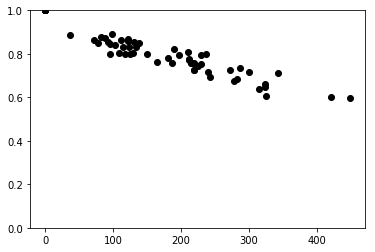

In [13]:
# calculating the covariance for zerO lag
i = 0

y0 = [None] * 66
x0 = [None] * 66
k=0
for first_column in df_wind_data:
    df1 = df[first_column]
    std_test1=np.std(df1)
    j = 0 
    for second_column in df_wind_data:
        if j <= i:
            df2 = df[second_column]
            std_test2=np.std(df2)
            y0[k] = (np.cov(df1,df2)/(std_test1*std_test2)).item((0, 1))
            x0[k] = df_distances.iloc[i,j]
            j = j + 1
            k = k + 1
    i = i + 1
plt.scatter(x0, y0,  color='black')
plt.ylim(0, 1)


(0, 1)

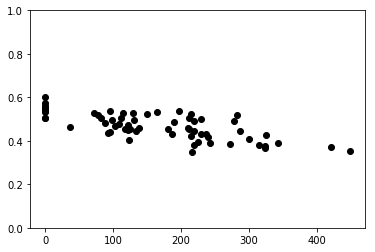

In [14]:
# calculating the covariance for lag 1 day
i = 0

y1 = [None] * 66
x1 = [None] * 66
k=0
for first_column in df_wind_data:
    df1 = df[first_column][:-1]
    std_test1=np.std(df1)
    j = 0 
    for second_column in df_wind_data:
        if j <= i:
            df2 = df[second_column][1:]
            std_test2=np.std(df2)
            y1[k] = (np.cov(df1,df2)/(std_test1*std_test2)).item((0, 1))
            x1[k] = df_distances.iloc[i,j]
            j = j + 1
            k = k + 1
    i = i + 1
plt.scatter(x1, y1,  color='black')
plt.ylim(0, 1)


(0, 1)

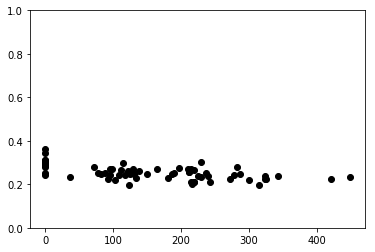

In [15]:
# calculating the covariance for lag 2 day
i = 0

y2 = [None] * 66
x2 = [None] * 66
k=0
for first_column in df_wind_data:
    df1 = df[first_column][:-2]
    std_test1=np.std(df1)
    j = 0 
    for second_column in df_wind_data:
        if j <= i:
            df2 = df[second_column][2:]
            std_test2=np.std(df2)
            y2[k] = (np.cov(df1,df2)/(std_test1*std_test2)).item((0, 1))
            x2[k] = df_distances.iloc[i,j]
            j = j + 1
            k = k + 1
    i = i + 1
plt.scatter(x2, y2,  color='black')
plt.ylim(0, 1)


(0, 1)

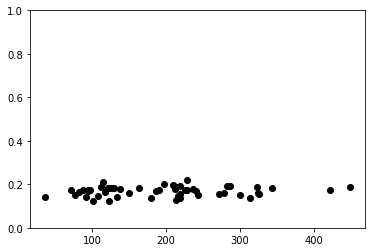

In [16]:
# calculating the covariance for lag 3 day
i = 0

df2 = df1.iloc[1:] # lose the first day
df3 = df1[:-1] #remove the last day

y3 = [None] * 55
x3 = [None] * 55
k=0
for first_column in df_wind_data:
    df1 = df[first_column][:-3]
    std_test1=np.std(df1)
    j = 0 
    for second_column in df_wind_data:
        if j < i:
    
            df2 = df[second_column][3:]
            std_test2=np.std(df2)
            y3[k] = (np.cov(df1,df2)/(std_test1*std_test2)).item((0, 1))
            x3[k] = df_distances.iloc[i,j]
            j = j + 1
            k = k + 1
    i = i + 1
plt.scatter(x3, y3,  color='black')
plt.ylim(0, 1)


In [17]:
print(sum(y0)/len(y0))
print(sum(y1)/len(y1))
print(sum(y2)/len(y2))
print(sum(y3)/len(y3))

0.812560844954895
0.470346097735169
0.25349215682594256
0.16906524797518074


In [18]:
#Fitting the curve for only distances
def func(x, a, b):
    return a * np.exp(-b * x)

#Fit for the parameters a, b of the function func:

popt, pcov = curve_fit(func, x0, y0, bounds=(0, [1., 1.]))
popt

array([ 0.97756926,  0.00120124])

In [19]:
#Testing curve fitting for only temporal part
def func(x, a, b):
    return (a * x**b  +  1)**(-1)

#Fit for the parameters a, b of the function func:

popt, pcov = curve_fit(func, x3, y3, bounds=(0, [1., 2.]))
popt

array([ 1.        ,  0.31092494])

In [20]:
#Testing curve fitting for only temporal part
def func(x, a, b):
    return (a * x**b  +  1)**(-1)

#Fit for the parameters a, b of the function func:
#testy = [0.797,0.526, 0.267, 0.179]

testy = [sum(y1)/len(y1), sum(y2)/len(y2),sum(y3)/len(y3)]

testx = [1,2,3]

popt, pcov = curve_fit(func, testx, testy, bounds=(0, [2., 2.]))
popt

array([ 1.13031065,  1.35650561])